# E-commerce Case Study: Weekend Discounts


In [1]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Sajal Jaiswal\\Downloads\\resources\\e commerce 2\\data.csv", encoding='ISO-8859-1') 
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove cancelled orders (invoices starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [3]:
# Add total order value per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Add day of week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Add weekend flag
df['is_weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])

# Add date only (ignore time)
df['InvoiceDay'] = df['InvoiceDate'].dt.date


In [4]:
weekend_avg = df[df['is_weekend']]['TotalPrice'].mean()
weekday_avg = df[~df['is_weekend']]['TotalPrice'].mean()

print("Avg Order Value - Weekend:", weekend_avg)
print("Avg Order Value - Weekday:", weekday_avg)


Avg Order Value - Weekend: 12.624678948626048
Avg Order Value - Weekday: 24.224728950407133


In [5]:
weekend_customers = df[df['is_weekend']]['CustomerID'].nunique()
weekday_customers = df[~df['is_weekend']]['CustomerID'].nunique()

print("Customers - Weekend:", weekend_customers)
print("Customers - Weekday:", weekday_customers)


Customers - Weekend: 1225
Customers - Weekday: 4081


In [6]:
#Hypotheses Testing

from scipy.stats import ttest_ind

weekend_sales = df[df['is_weekend']]['TotalPrice']
weekday_sales = df[~df['is_weekend']]['TotalPrice']

t_stat, p_value = ttest_ind(weekend_sales, weekday_sales, equal_var=False)
print("P-value:", p_value)


P-value: 2.784415252556265e-85


In [7]:
#Linear Regression Testing
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[['UnitPrice']]  # Discount-like signal
y = df['TotalPrice']

model.fit(X, y)

print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))  # Closer to 1 = better prediction


Slope: 1.1419383024100107
Intercept: 18.836269508402278
R² Score: 0.006666077793363923


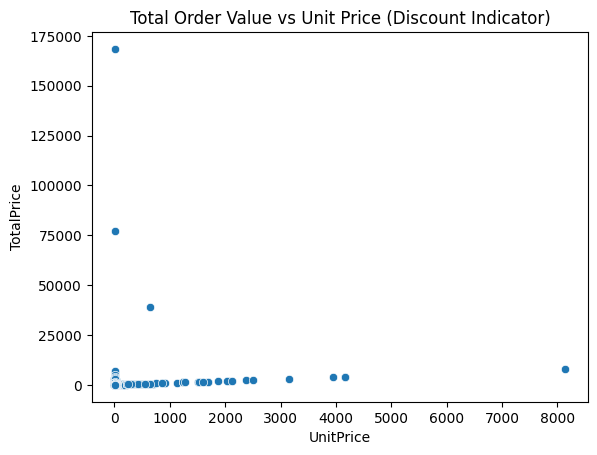

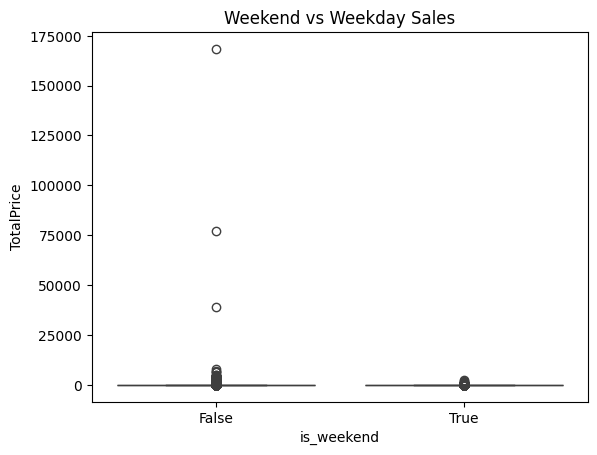

In [8]:
#Visual Insight 

import seaborn as sns
import matplotlib.pyplot as plt

# Order Value vs UnitPrice
sns.scatterplot(x='UnitPrice', y='TotalPrice', data=df)
plt.title("Total Order Value vs Unit Price (Discount Indicator)")
plt.show()

# Weekend vs Weekday Total Sales
sns.boxplot(x='is_weekend', y='TotalPrice', data=df)
plt.title("Weekend vs Weekday Sales")
plt.show()
